Q-3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the<br>
data and calculate the following <br>
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_ <br>
a. Measure the dispersion in both and interpret the results. <br>
b. Calculate mean and 5% confidence interval and plot it in a graph<br>
c. Calculate the Mean absolute deviation and Standard deviation and interpret
the results.<br>
d. Calculate the correlation coefficient and check the significance of it at 1% level
of significance.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


a. Measure the dispersion in both and interpret the results. <br>

In [5]:
df.iloc[::,1:].describe()

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
count,100.000000,100.000000
mean,133.910000,128.360000
std,6.598278,6.888022
min,120.000000,118.000000
25%,128.000000,123.000000
50%,135.000000,128.000000
75%,139.250000,135.000000
max,148.000000,141.000000


In [6]:
#They are some outliers in the data 
#They are no missing values 
# The spread of the data in both columns are nearly equal 

b. Calculate mean and 5% confidence interval and plot it in a graph<br>

In [15]:
df.head(5)

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


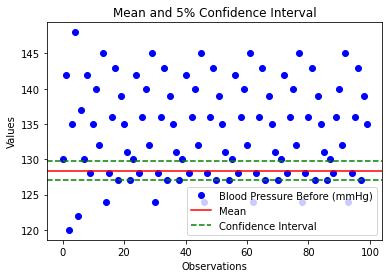

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate the mean
mean_bpb = df[' Blood Pressure Before (mmHg)'].mean()
mean_bpb = df[' Blood Pressure After (mmHg)'].mean()

# Calculate the sample size
n = df.shape[0]

# Calculate the standard error
std_err_bpb = stats.sem(df[' Blood Pressure Before (mmHg)'])
std_err_bpf = stats.sem(df[' Blood Pressure After (mmHg)'])
# Set the confidence level (1 - alpha)
confidence = 0.95

# Calculate the margin of error
margin_error_bpb = stats.t.ppf((1 + confidence) / 2, n - 1) * std_err_bpb
margin_error_bpf = stats.t.ppf((1 + confidence) / 2, n - 1) * std_err_bpf
# Calculate the confidence interval
lower_bound_bpb = mean_bpb - margin_error_bpb
upper_bound_bpb = mean_bpb + margin_error_bpf

# Plot the data and confidence interval
plt.figure()
plt.plot(df[' Blood Pressure Before (mmHg)'], 'bo', label='Blood Pressure Before (mmHg)')
plt.axhline(mean_bpb, color='r', label='Mean')
plt.axhline(lower_bound_bpb, color='g', linestyle='--', label='Confidence Interval')
plt.axhline(upper_bound_bpb, color='g', linestyle='--')
plt.xlabel('Observations')
plt.ylabel('Values')
plt.legend()
plt.title('Mean and 5% Confidence Interval')
plt.show()

# Print the results
# print(f"Mean: {mean:.2f}")
# print(f"Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")


**c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.**

In [25]:
#Mean Absolute Deviation
df.iloc[::,1:].mad()

 Blood Pressure Before (mmHg)    5.7118
 Blood Pressure After (mmHg)     5.9000
dtype: float64

In [26]:
#Standred Deviation 
np.std(df.iloc[::,1:])

 Blood Pressure Before (mmHg)    6.565204
 Blood Pressure After (mmHg)     6.853495
dtype: float64

d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [27]:
df.iloc[::,1:].corr()

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
Blood Pressure Before (mmHg),1.000000,0.977949
Blood Pressure After (mmHg),0.977949,1.000000


In [33]:
from scipy.stats import pearsonr
_,p_value = pearsonr(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])

In [36]:
alpha = 0.01
if p_value < alpha:
    print("significant")
else:
    print("not significant")

significant


Q-6. A pharmaceutical company is developing a drug that is supposed to reduce blood pressure. <br>
They conduct a clinical trial with 100 patients and record their blood pressure before and after taking the drug. <br>
The company wants to know if the change in blood pressure follows a normal distribution. <br>
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [39]:
import seaborn as sns

<AxesSubplot:xlabel=' Blood Pressure After (mmHg)', ylabel='Density'>

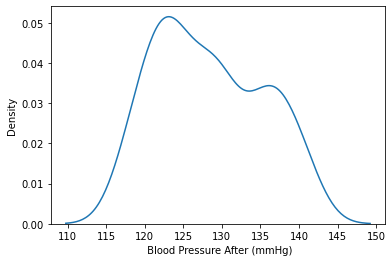

In [40]:
sns.kdeplot(df[' Blood Pressure After (mmHg)'])

In [ ]:
#It is not a perfect normal disrtubtion but it is close.

Q-10. A factory produces light bulbs, and the probability of a bulb being defective is 0.05.<br> 
The factory produces a large batch of 500 light bulbs.<br> 
a. What is the probability that exactly 20 bulbs are defective? <br>
b. What is the probability that at least 10 bulbs are defective? <br>
c. What is the probability that at max 15 bulbs are defective? <br>
d. On average, how many defective bulbs would you expect in a batch of 500?

In [42]:
import math

def binomial_coefficient(n, k):
    return math.comb(n, k)

def probability_defective_bulbs(k, n, p):
    return binomial_coefficient(n, k) * (p ** k) * ((1 - p) ** (n - k))

def expected_defective_bulbs(n, p):
    return n * p

p_defective = 0.05
total_bulbs = 500

# a. Probability of exactly 20 bulbs being defective
prob_20_defective = probability_defective_bulbs(20, total_bulbs, p_defective)

# b. Probability of at least 10 bulbs being defective
prob_at_least_10_defective = sum(probability_defective_bulbs(k, total_bulbs, p_defective) for k in range(10, total_bulbs+1))

# c. Probability of at most 15 bulbs being defective
prob_at_most_15_defective = sum(probability_defective_bulbs(k, total_bulbs, p_defective) for k in range(16))

# d. Expected number of defective bulbs in a batch of 500
expected_defective = expected_defective_bulbs(total_bulbs, p_defective)

print("a. Probability of exactly 20 bulbs being defective:", prob_20_defective * 100)
print("b. Probability of at least 10 bulbs being defective:", prob_at_least_10_defective *100)
print("c. Probability of at most 15 bulbs being defective:", prob_at_most_15_defective *100)
print("d. Expected number of defective bulbs in a batch of 500:", expected_defective*100)


a. Probability of exactly 20 bulbs being defective: 5.161619253663996
b. Probability of at least 10 bulbs being defective: 99.98316463654692
c. Probability of at most 15 bulbs being defective: 1.9858377163006222
d. Expected number of defective bulbs in a batch of 500: 2500.0


Q-11. Given the data of a feature contributing to different classes <br>
https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp =share_ <br>
a. Check whether the distribution of all the classes are the same or not. <br>
b. Check for the equality of variance/ <br>
c. Which amount LDA and QDA would perform better on this data for classification and why.<br> d. Check the equality of mean for between all the classes.

In [43]:
np.std([89,78.3,87.6,73.3,87.6])

6.23493384086792